In [13]:
# imports
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("output.csv", index_col=0)
df.columns.to_list()

['entropy',
 'complexity',
 'aeX',
 'aeY',
 'chunk_num',
 'labels',
 'dataset',
 'isDegraded',
 'autocluster',
 'egci_clusters']

In [15]:
target_columns = ['dataset', 'autocluster', 'egci_clusters', 'labels']
df = df[target_columns]
df = df.astype(str)

In [16]:
nodelist = pd.melt(df)
nodelist = [var + val for var, val in nodelist.drop_duplicates().to_numpy()]

In [17]:
adjacency_df = pd.DataFrame(0, index=nodelist, columns=nodelist)

In [ ]:
from itertools import product

for row in df.itertuples():
    nodes = [row._fields[i]+str(row[i]) for i in range(len(row._fields)) if row._fields[i] != "Index"]
    for node1, node2 in product(nodes, nodes):
        if node1 != node2:
            adjacency_df.loc[node1, node2] += 1

In [33]:
normalize = lambda e: (e-e.min())/(e.max()-e.min())

for column in adjacency_df.columns.to_list():
    adjacency_df[column] = normalize(adjacency_df[column])
    
for index in adjacency_df.index:
    adjacency_df.loc[index] = normalize(adjacency_df.loc[index])

<Axes: >

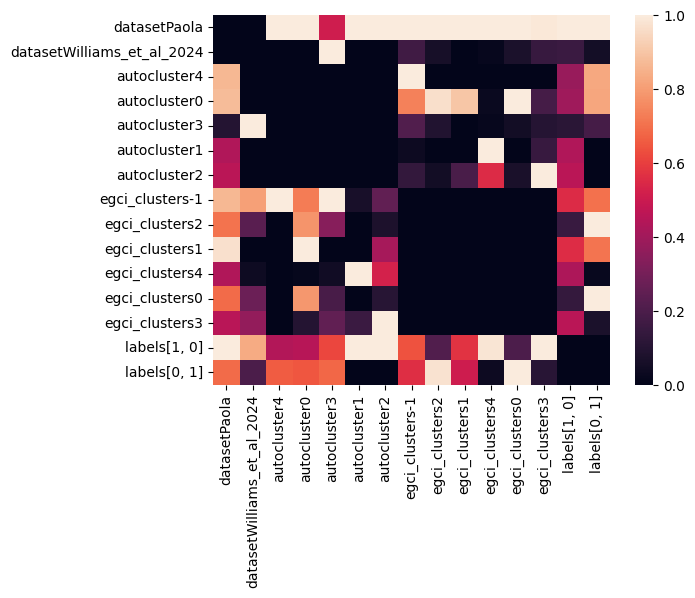

In [34]:
import seaborn as sns
sns.heatmap(adjacency_df)

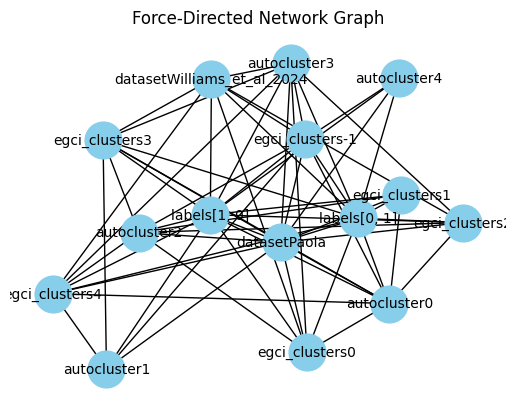

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_adjacency(adjacency_df)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, font_color='black')

# Display the plot
plt.title("Force-Directed Network Graph")
plt.axis('off') # Turn off the axis
plt.show()